Set up data

Using TensorFlow backend.


x_images.shape = (5547, 50, 50, 3)
x_images.min/mean/std/max = 2.00/185.03/47.25/255.00

y_images.shape = (5547,)
y_images.min/mean/std/max = 0.00/0.50/0.50/1.00
red channel: min/mean/std/max = 4.00/205.79/36.29/255.00
green channel: min/mean/std/max = 2.00/161.87/53.94/255.00
blue channel: min/mean/std/max = 5.00/187.44/38.69/255.00


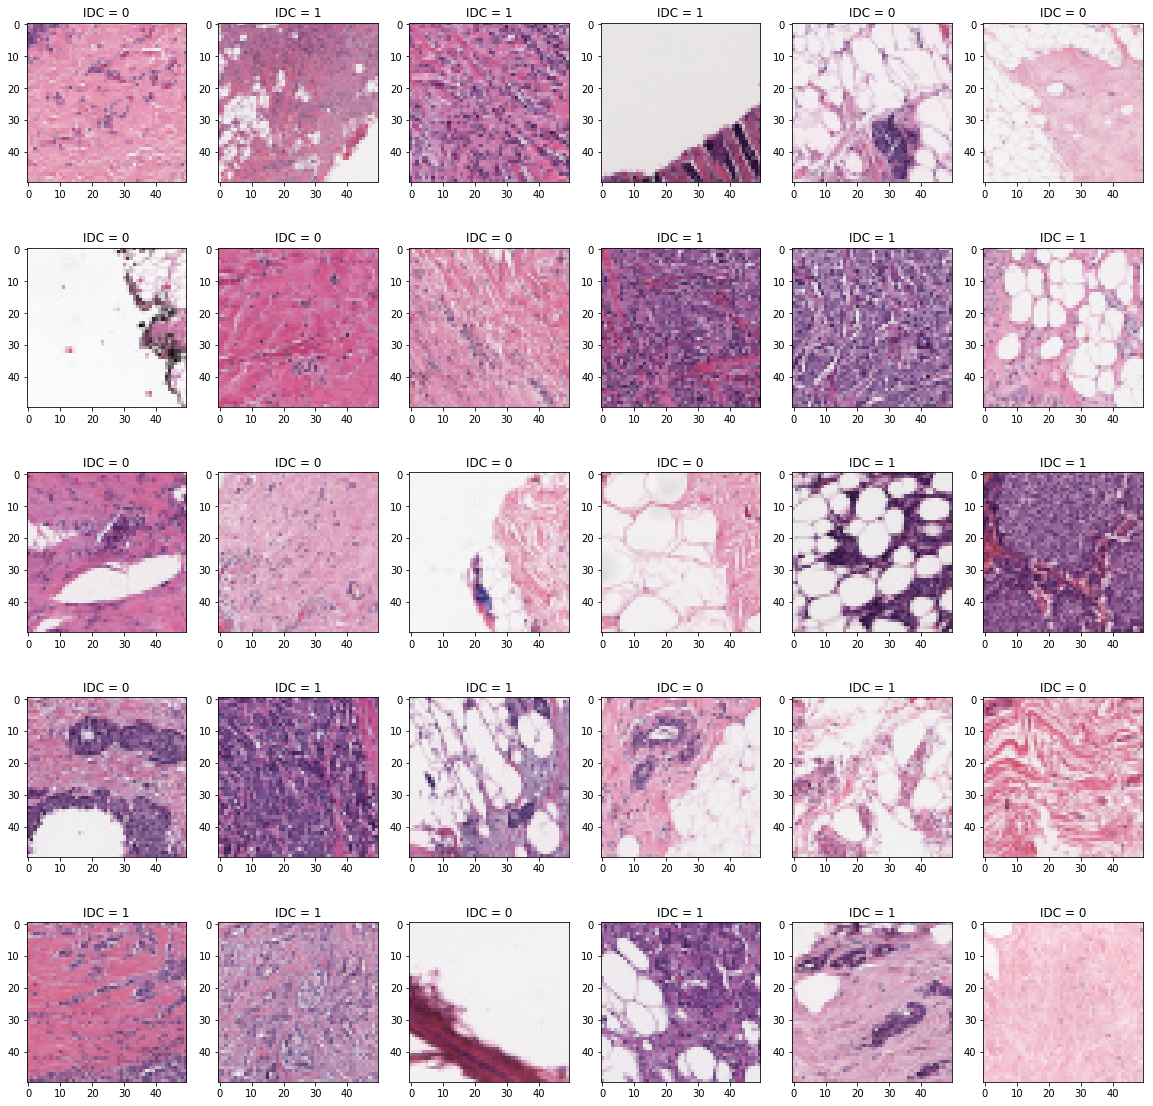

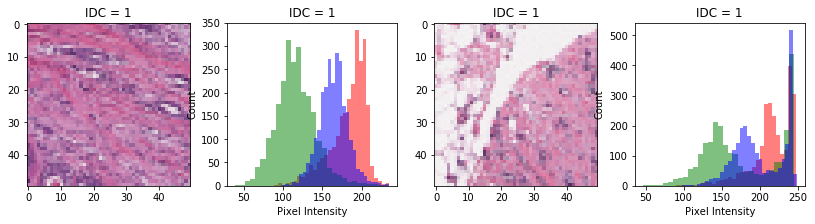

In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
import keras.preprocessing.image
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import os;
import datetime  
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

x_images = np.load('C:\\Users\\jsvz\\OneDrive - Chevron\\Documents\\Python Scripts\\Ben\\X.npy')
 
y_images = np.load('C:\\Users\\jsvz\\OneDrive - Chevron\\Documents\\Python Scripts\\Ben\\Y.npy') 

perm_array = np.arange(len(x_images))
np.random.shuffle(perm_array)
x_images = x_images[perm_array]
y_images = y_images[perm_array]

print('x_images.shape =', x_images.shape)
print('x_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images.min(),
                        x_images.mean(), x_images.std(), x_images.max()))
print('')
print('y_images.shape =', y_images.shape)
print('y_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_images.min(),
                        y_images.mean(), y_images.std(), y_images.max()))


imgs_0 = x_images[y_images == 0] # 0 = no cancer
imgs_1 = x_images[y_images == 1] # 1 = cancer

plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('IDC = %d'%y_images[i])
    plt.imshow(x_images[i])
    
plt.figure(figsize=(14,3))

for i in range(2):
    n_img = np.random.randint(len(x_images))
    plt.subplot(1,4,1+2*i)
    plt.title('IDC = %d'%y_images[n_img])
    plt.imshow(x_images[n_img])
    plt.subplot(1,4,2+2*i)
    plt.title('IDC = %d'%y_images[n_img])
    plt.ylabel('Count')
    plt.xlabel('Pixel Intensity')
    plt.hist(x_images[n_img,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
    plt.hist(x_images[n_img,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
    plt.hist(x_images[n_img,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);

print('red channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,0].min(),
    x_images[:,:,:,0].mean(), x_images[:,:,:,0].std(), x_images[:,:,:,0].max()))
print('green channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,1].min(),
    x_images[:,:,:,1].mean(), x_images[:,:,:,1].std(), x_images[:,:,:,1].max()))
print('blue channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,2].min(),
    x_images[:,:,:,2].mean(), x_images[:,:,:,2].std(), x_images[:,:,:,2].max()))


Build and train network

x_train_valid.shape = (5547, 50, 50, 3)
x_train_valid.min/mean/std/max = 0.01/0.73/0.19/1.00

y_train_valid.shape = (5547, 2)
y_train_valid.min/mean/std/max = 0.00/0.50/0.50/1.00
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

num_weights = 357228
num_biases = 684
13-02-2020 22:06:26 : start training
learnrate = 0.001 , n_epoch = 1.0 , mb_size = 50 , nn_name = nn0
0.01 epoch: train/val loss = 6.2647/7.0873, train/val acc = 0.5495/0.4955
0.10 epoch: train/val loss = 1.0432/1.1691, train/val acc = 0.5495/0.4955
0.19 epoch: train/val loss = 0.6774/0.7003, train/val acc = 0.5495/0.4937
0.28 epoch: train/val loss = 0.7180/0.6944, train/val acc = 0.4505/0.5045
0.37 ep

7.77 epoch: train/val loss = 0.5305/0.5310, train/val acc = 0.7351/0.7423
7.86 epoch: train/val loss = 0.4994/0.4966, train/val acc = 0.7532/0.7586
generate new set of images
7.95 epoch: train/val loss = 0.4932/0.5104, train/val acc = 0.7838/0.7532
8.04 epoch: train/val loss = 0.4814/0.4888, train/val acc = 0.7928/0.7676
8.13 epoch: train/val loss = 0.4842/0.4836, train/val acc = 0.7802/0.7604
8.22 epoch: train/val loss = 0.4994/0.5357, train/val acc = 0.7676/0.7369
8.31 epoch: train/val loss = 0.4791/0.4848, train/val acc = 0.7982/0.7712
8.40 epoch: train/val loss = 0.5638/0.6214, train/val acc = 0.7081/0.6577
8.49 epoch: train/val loss = 0.5107/0.4948, train/val acc = 0.7514/0.7712
8.58 epoch: train/val loss = 0.5156/0.4895, train/val acc = 0.7495/0.7658
8.67 epoch: train/val loss = 0.5022/0.5188, train/val acc = 0.7730/0.7622
8.76 epoch: train/val loss = 0.4935/0.5060, train/val acc = 0.7946/0.7694
8.85 epoch: train/val loss = 0.5007/0.4915, train/val acc = 0.7550/0.7712
generate ne

17.24 epoch: train/val loss = 0.4866/0.4797, train/val acc = 0.7856/0.7694
17.33 epoch: train/val loss = 0.4929/0.4897, train/val acc = 0.7820/0.7640
17.42 epoch: train/val loss = 0.4942/0.4937, train/val acc = 0.7766/0.7604
17.51 epoch: train/val loss = 0.4898/0.4866, train/val acc = 0.7820/0.7676
17.60 epoch: train/val loss = 0.4954/0.4791, train/val acc = 0.7586/0.7640
17.69 epoch: train/val loss = 0.5094/0.5224, train/val acc = 0.7604/0.7477
17.78 epoch: train/val loss = 0.4875/0.4814, train/val acc = 0.7784/0.7712
generate new set of images
17.87 epoch: train/val loss = 0.4848/0.4839, train/val acc = 0.7730/0.7712
17.96 epoch: train/val loss = 0.5065/0.5159, train/val acc = 0.7604/0.7550
0:53:35.020513 : set learn rate to 0.000100
18.05 epoch: train/val loss = 0.4798/0.4811, train/val acc = 0.7586/0.7730
18.14 epoch: train/val loss = 0.4814/0.4840, train/val acc = 0.7730/0.7676
18.23 epoch: train/val loss = 0.5084/0.5176, train/val acc = 0.7586/0.7495
18.32 epoch: train/val loss =

26.70 epoch: train/val loss = 0.4733/0.4911, train/val acc = 0.7910/0.7640
generate new set of images
26.79 epoch: train/val loss = 0.4850/0.5279, train/val acc = 0.7766/0.7459
26.88 epoch: train/val loss = 0.4271/0.4771, train/val acc = 0.8090/0.7748
26.97 epoch: train/val loss = 0.4294/0.4797, train/val acc = 0.8126/0.7730
1:21:05.871887 : set learn rate to 0.000025
27.06 epoch: train/val loss = 0.4687/0.5142, train/val acc = 0.7910/0.7604
27.15 epoch: train/val loss = 0.4559/0.5035, train/val acc = 0.8108/0.7622
27.24 epoch: train/val loss = 0.4287/0.4799, train/val acc = 0.8144/0.7766
27.33 epoch: train/val loss = 0.4249/0.4763, train/val acc = 0.8108/0.7748
27.42 epoch: train/val loss = 0.4276/0.4773, train/val acc = 0.8090/0.7748
27.51 epoch: train/val loss = 0.4461/0.4923, train/val acc = 0.8090/0.7658
27.60 epoch: train/val loss = 0.4429/0.4889, train/val acc = 0.8108/0.7622
27.69 epoch: train/val loss = 0.4574/0.5019, train/val acc = 0.8054/0.7676
generate new set of images
27

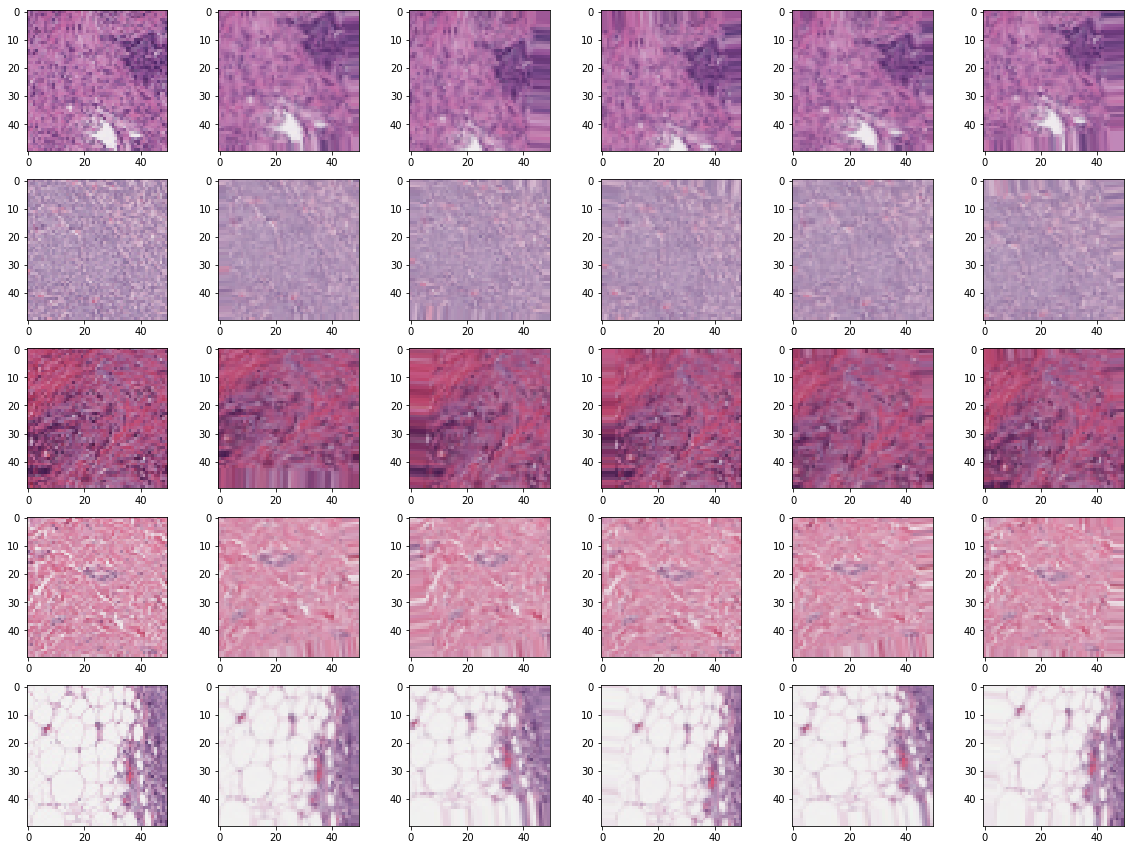

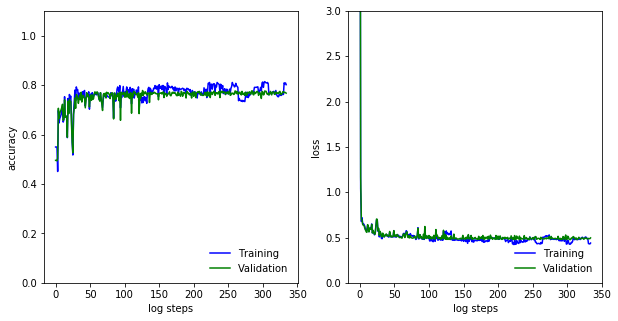

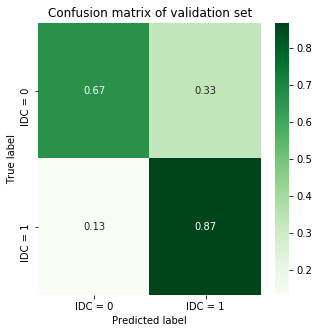

In [2]:


# convert one-hot encodings into labels
def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot,1)

# convert class labels from scalars to one-hot vectors e.g. 1 => [0 1], 0 => [1 0]
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# function to normalize data
def normalize_data(data): 
    # scale features using statistics that are robust to outliers
    #rs = sklearn.preprocessing.RobustScaler()
    #rs.fit(data)
    #data = rs.transform(data)
    #data = (data-data.mean())/(data.std()) # standardisation
    data = data / data.max() # convert from [0:255] to [0.:1.]
    #data = ((data / 255.)-0.5)*2. # convert from [0:255] to [-1.:+1.]
    return data

# training and validation data
x_train_valid = normalize_data(x_images)

# use one-hot encoding for labels 0,1
y_train_valid = dense_to_one_hot(y_images, 2).astype(np.uint8)

# dictionaries for saving results
y_valid_pred = {}
y_train_pred = {}
y_test_pred = {}
train_loss, valid_loss = {}, {}
train_acc, valid_acc = {}, {}
cnf_valid_matrix = {}

print('x_train_valid.shape =', x_train_valid.shape)
print('x_train_valid.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_train_valid.min(),
                        x_train_valid.mean(), x_train_valid.std(), x_train_valid.max()))
print('')
print('y_train_valid.shape =', y_train_valid.shape)
print('y_train_valid.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_train_valid.min(),
                        y_train_valid.mean(), y_train_valid.std(), y_train_valid.max()))
    
## augment data

# generate new images via rotations, translations, zoom using keras
def generate_images(imgs):
    
    # rotations, translations, zoom
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    # get transformed images
    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
    return imgs[0]

# check image generation
fig,axs = plt.subplots(5,6, figsize=(20,15))
for i in range(5):
    n = np.random.randint(0,x_images.shape[0]-2)
    axs[i,0].imshow(x_images[n])
    axs[i,1].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,2].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,3].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,4].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,5].imshow(generate_images(x_images[n:n+1])[0].astype('uint8')) 



class nn_class:
# class that implements the neural network

    # constructor
    def __init__(self, nn_name = 'tmp', log_step = 0.1, keep_prob = 0.33, mb_size = 50,
                 width = 50, height = 50, n_channel = 3, n_output = 2):

        # tunable hyperparameters for nn architecture
        self.s_f_conv1 = 3 # filter size of first convolution layer (default = 3)
        self.n_f_conv1 = 36 # number of features of first convolution layer (default = 36)
        self.s_f_conv2 = 3 # filter size of second convolution layer (default = 3)
        self.n_f_conv2 = 36 # number of features of second convolution layer (default = 36)
        self.s_f_conv3 = 3 # filter size of third convolution layer (default = 3)
        self.n_f_conv3 = 36 # number of features of third convolution layer (default = 36)
        self.n_n_fc1 = 576 # number of neurons of first fully connected layer (default = 576)
        self.n_channel = n_channel
        self.width = width
        self.height = height
        self.n_output = n_output
        
        # tunable hyperparameters for training
        self.mb_size = mb_size # mini batch size
        self.keep_prob = keep_prob # keeping probability with dropout regularization 
        self.learn_rate_array = [10*1e-4, 7.5*1e-4, 5*1e-4, 2.5*1e-4, 1*1e-4, 1*1e-4,
                                 1*1e-4, 0.75*1e-4, 0.5*1e-4, 0.25*1e-4, 0.1*1e-4, 
                                 0.1*1e-4, 0.075*1e-4,0.050*1e-4, 0.025*1e-4, 0.01*1e-4, 
                                 0.0075*1e-4, 0.0050*1e-4,0.0025*1e-4,0.001*1e-4]
        self.learn_rate_step_size = 3 # in terms of epochs
        
        # helper variables
        self.learn_rate = self.learn_rate_array[0]
        self.learn_rate_pos = 0 # current position pointing to current learning rate
        self.index_in_epoch = 0 
        self.current_epoch = 0
        self.log_step = log_step # log results in terms of epochs
        self.n_log_step = 0 # counting current number of mini batches trained on
        self.use_tb_summary = False # True = use tensorboard visualization
        self.use_tf_saver = False # True = use saver to save the model
        self.nn_name = nn_name # name of the neural network
        self.perm_array = np.array([]) # permutation array
        
    # function to get the next mini batch
    def next_mini_batch(self):

        start = self.index_in_epoch
        self.index_in_epoch += self.mb_size
        self.current_epoch += self.mb_size/len(self.x_train)  
        
        # adapt length of permutation array
        if not len(self.perm_array) == len(self.x_train):
            self.perm_array = np.arange(len(self.x_train))
        
        # shuffle once at the start of epoch
        if start == 0:
            np.random.shuffle(self.perm_array)

        # at the end of the epoch
        if self.index_in_epoch > self.x_train.shape[0]:
            np.random.shuffle(self.perm_array) # shuffle data
            start = 0 # start next epoch
            self.index_in_epoch = self.mb_size # set index to mini batch size
            
            if self.train_on_augmented_data:
                # use augmented data for the next epoch
                self.x_train_aug = normalize_data(self.generate_images(self.x_train))
                self.y_train_aug = self.y_train
                
        end = self.index_in_epoch
        
        if self.train_on_augmented_data:
            # use augmented data
            x_tr = self.x_train_aug[self.perm_array[start:end]]
            y_tr = self.y_train_aug[self.perm_array[start:end]]
        else:
            # use original data
            x_tr = self.x_train[self.perm_array[start:end]]
            y_tr = self.y_train[self.perm_array[start:end]]
        
        return x_tr, y_tr
               
    # generate new images via rotations, translations, zoom using keras
    def generate_images(self, imgs):
    
        print('generate new set of images')
        
        # rotations, translations, zoom
        image_generator = keras.preprocessing.image.ImageDataGenerator(
            rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
            zoom_range = 0.1)

        # get transformed images
        imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                    batch_size=len(imgs), shuffle = False).next()    

        return imgs[0]

    # weight initialization
    def weight_variable(self, shape, name = None):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial, name = name)

    # bias initialization
    def bias_variable(self, shape, name = None):
        initial = tf.constant(0.1, shape=shape) #  positive bias
        return tf.Variable(initial, name = name)

    # 2D convolution
    def conv2d(self, x, W, name = None):
        return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', name = name)

    # max pooling
    def max_pool_2x2(self, x, name = None):
        return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                              padding='SAME', name = name)

    # attach summaries to a tensor for TensorBoard visualization
    def summary_variable(self, var, var_name):
        with tf.name_scope(var_name):
            mean = tf.reduce_mean(var)
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('mean', mean)
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)
    
    # function to create the graph
    def create_graph(self):

        # reset default graph
        tf.reset_default_graph()

        # variables for input and output 
        self.x_data_tf = tf.placeholder(dtype=tf.float32, shape=[None,self.height,
                                        self.width,self.n_channel], name='x_data_tf')
        self.y_data_tf = tf.placeholder(dtype=tf.float32, shape=[None, self.n_output],
                                        name='y_data_tf')

        # 1.layer: convolution + max pooling
        self.W_conv1_tf = self.weight_variable([self.s_f_conv1, self.s_f_conv1, self.n_channel,
                                                self.n_f_conv1], name='W_conv1_tf') # (3,3,3,36)
        self.b_conv1_tf = self.bias_variable([self.n_f_conv1], name = 'b_conv1_tf') # (36)
        self.h_conv1_tf = tf.nn.relu(self.conv2d(self.x_data_tf, self.W_conv1_tf) 
                                     + self.b_conv1_tf, name = 'h_conv1_tf') # (.,50,50,36)
        self.h_pool1_tf = self.max_pool_2x2(self.h_conv1_tf, 
                                            name = 'h_pool1_tf') # (.,25,25,36)
        
        # 2.layer: convolution + max pooling
        self.W_conv2_tf = self.weight_variable([self.s_f_conv2, self.s_f_conv2, 
                                self.n_f_conv1, self.n_f_conv2], name = 'W_conv2_tf')
        self.b_conv2_tf = self.bias_variable([self.n_f_conv2], name = 'b_conv2_tf')
        self.h_conv2_tf = tf.nn.relu(self.conv2d(self.h_pool1_tf, 
                        self.W_conv2_tf) + self.b_conv2_tf, name ='h_conv2_tf') #(.,25,25,36)
        self.h_pool2_tf = self.max_pool_2x2(self.h_conv2_tf, name = 'h_pool2_tf') #(.,13,13,36)

        # 3.layer: convolution + max pooling
        self.W_conv3_tf = self.weight_variable([self.s_f_conv3, self.s_f_conv3, 
                        self.n_f_conv2, self.n_f_conv3], name = 'W_conv3_tf')
        self.b_conv3_tf = self.bias_variable([self.n_f_conv3], name = 'b_conv3_tf')
        self.h_conv3_tf = tf.nn.relu(self.conv2d(self.h_pool2_tf, self.W_conv3_tf) + 
                                     self.b_conv3_tf, name ='h_conv3_tf') #(.,13,13,36)
        self.h_pool3_tf = self.max_pool_2x2(self.h_conv3_tf, name='h_pool3_tf') # (.,7,7,36)
        
        # 4.layer: fully connected
        self.W_fc1_tf = self.weight_variable([7*7*self.n_f_conv3, self.n_n_fc1], 
                                             name='W_fc1_tf') # (7*7*36, 1024)
        self.b_fc1_tf = self.bias_variable([self.n_n_fc1], name = 'b_fc1_tf') # (1024)
        self.h_pool3_flat_tf = tf.reshape(self.h_pool3_tf, [-1,7*7*self.n_f_conv3], 
                                          name = 'h_pool3_flat_tf') # (.,1024)
        self.h_fc1_tf = tf.nn.relu(tf.matmul(self.h_pool3_flat_tf, 
                           self.W_fc1_tf) + self.b_fc1_tf, name = 'h_fc1_tf') # (.,1024)
      
        # add dropout
        self.keep_prob_tf = tf.placeholder(dtype=tf.float32, name = 'keep_prob_tf')
        self.h_fc1_drop_tf = tf.nn.dropout(self.h_fc1_tf, self.keep_prob_tf, 
                                           name = 'h_fc1_drop_tf')

        # 5.layer: fully connected
        self.W_fc2_tf = self.weight_variable([self.n_n_fc1, self.n_output],
                                             name='W_fc2_tf') # (1024,1)
        self.b_fc2_tf = self.bias_variable([self.n_output], name='b_fc2_tf') # (1024)
        self.z_pred_tf = tf.add(tf.matmul(self.h_fc1_drop_tf, self.W_fc2_tf), 
                                self.b_fc2_tf, name = 'z_pred_tf')# => (.,1)

        # cost function
        self.cross_entropy_tf = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            labels=self.y_data_tf, logits=self.z_pred_tf), name = 'cross_entropy_tf')
     
        # optimisation function
        self.learn_rate_tf = tf.placeholder(dtype=tf.float32, name="learn_rate_tf")
        self.train_step_tf = tf.train.AdamOptimizer(self.learn_rate_tf).minimize(
            self.cross_entropy_tf, name = 'train_step_tf')

        # predicted probabilities in one-hot encoding
        self.y_pred_proba_tf = tf.nn.softmax(self.z_pred_tf, name='y_pred_proba_tf') 
        
        # tensor of correct predictions
        self.y_pred_correct_tf = tf.equal(tf.argmax(self.y_pred_proba_tf, 1),
                                          tf.argmax(self.y_data_tf, 1),
                                          name = 'y_pred_correct_tf')  
        
        # accuracy 
        self.accuracy_tf = tf.reduce_mean(tf.cast(self.y_pred_correct_tf, dtype=tf.float32),
                                         name = 'accuracy_tf')

        # tensors to save intermediate accuracies and losses during training
        self.train_loss_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                         name='train_loss_tf', validate_shape = False)
        self.valid_loss_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                         name='valid_loss_tf', validate_shape = False)
        self.train_acc_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                        name='train_acc_tf', validate_shape = False)
        self.valid_acc_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                        name='valid_acc_tf', validate_shape = False)
     
        # number of weights and biases
        num_weights = (self.s_f_conv1**2*self.n_f_conv1*self.n_channel
                       + self.s_f_conv2**2*self.n_f_conv1*self.n_f_conv2 
                       + self.s_f_conv3**2*self.n_f_conv2*self.n_f_conv3 
                       + 4*4*self.n_f_conv3*self.n_n_fc1 + self.n_n_fc1*self.n_output)
        num_biases = self.n_f_conv1 + self.n_f_conv2 + self.n_f_conv3 + self.n_n_fc1
        print('num_weights =', num_weights)
        print('num_biases =', num_biases)
        
        return None  
    
    def attach_summary(self, sess):
        
        # create summary tensors for tensorboard
        self.use_tb_summary = True
        self.summary_variable(self.W_conv1_tf, 'W_conv1_tf')
        self.summary_variable(self.b_conv1_tf, 'b_conv1_tf')
        self.summary_variable(self.W_conv2_tf, 'W_conv2_tf')
        self.summary_variable(self.b_conv2_tf, 'b_conv2_tf')
        self.summary_variable(self.W_conv3_tf, 'W_conv3_tf')
        self.summary_variable(self.b_conv3_tf, 'b_conv3_tf')
        self.summary_variable(self.W_fc1_tf, 'W_fc1_tf')
        self.summary_variable(self.b_fc1_tf, 'b_fc1_tf')
        self.summary_variable(self.W_fc2_tf, 'W_fc2_tf')
        self.summary_variable(self.b_fc2_tf, 'b_fc2_tf')
        tf.summary.scalar('cross_entropy_tf', self.cross_entropy_tf)
        tf.summary.scalar('accuracy_tf', self.accuracy_tf)

        # merge all summaries for tensorboard
        self.merged = tf.summary.merge_all()

        # initialize summary writer 
        timestamp = datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')
        filepath = os.path.join(os.getcwd(), 'logs', (self.nn_name+'_'+timestamp))
        self.train_writer = tf.summary.FileWriter(os.path.join(filepath,'train'), sess.graph)
        self.valid_writer = tf.summary.FileWriter(os.path.join(filepath,'valid'), sess.graph)

    def attach_saver(self):
        # initialize tensorflow saver
        self.use_tf_saver = True
        self.saver_tf = tf.train.Saver()

    # function to train the graph
    def train_graph(self, sess, x_train, y_train, x_valid, y_valid, n_epoch = 1, 
                    train_on_augmented_data = False):

        # train on original or augmented data
        self.train_on_augmented_data = train_on_augmented_data
        
        # training and validation data
        self.x_train = x_train
        self.y_train = y_train
        self.x_valid = x_valid
        self.y_valid = y_valid
        
        # use augmented data
        if self.train_on_augmented_data:
            print('generate new set of images')
            self.x_train_aug = normalize_data(self.generate_images(self.x_train))
            self.y_train_aug = self.y_train
        
        # parameters
        mb_per_epoch = self.x_train.shape[0]/self.mb_size
        train_loss, train_acc, valid_loss, valid_acc = [],[],[],[]
        
        # start timer
        start = datetime.datetime.now();
        print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),': start training')
        print('learnrate =',self.learn_rate,', n_epoch =', n_epoch,
              ', mb_size =', self.mb_size, ', nn_name =', self.nn_name)
        # looping over mini batches
        for i in range(int(n_epoch*mb_per_epoch)+1):

            # adapt learn_rate
            if not self.learn_rate_pos == int(self.current_epoch // self.learn_rate_step_size):
                self.learn_rate_pos = int(self.current_epoch // self.learn_rate_step_size)
                self.learn_rate = self.learn_rate_array[self.learn_rate_pos]
                print(datetime.datetime.now()-start,': set learn rate to %.6f'%self.learn_rate)
            
            # get new batch
            x_batch, y_batch = self.next_mini_batch() 

            # run the graph
            sess.run(self.train_step_tf, feed_dict={self.x_data_tf: x_batch, 
                                                    self.y_data_tf: y_batch, 
                                                    self.keep_prob_tf: self.keep_prob, 
                                                    self.learn_rate_tf: self.learn_rate})
            # store losses and accuracies
            if i%int(self.log_step*mb_per_epoch) == 0 or i == int(n_epoch*mb_per_epoch):
             
                self.n_log_step += 1 # for logging the results
                
                feed_dict_train = {
                    self.x_data_tf: self.x_train[self.perm_array[:len(self.x_valid)]], 
                    self.y_data_tf: self.y_train[self.perm_array[:len(self.y_valid)]], 
                    self.keep_prob_tf: 1.0}
                
                feed_dict_valid = {self.x_data_tf: self.x_valid, 
                                   self.y_data_tf: self.y_valid, 
                                   self.keep_prob_tf: 1.0}
                
                # summary for tensorboard
                if self.use_tb_summary:
                    train_summary = sess.run(self.merged, feed_dict = feed_dict_train)
                    valid_summary = sess.run(self.merged, feed_dict = feed_dict_valid)
                    self.train_writer.add_summary(train_summary, self.n_log_step)
                    self.valid_writer.add_summary(valid_summary, self.n_log_step)
                
                train_loss.append(sess.run(self.cross_entropy_tf,
                                           feed_dict = feed_dict_train))

                train_acc.append(self.accuracy_tf.eval(session = sess, 
                                                       feed_dict = feed_dict_train))
                
                valid_loss.append(sess.run(self.cross_entropy_tf,
                                           feed_dict = feed_dict_valid))

                valid_acc.append(self.accuracy_tf.eval(session = sess, 
                                                       feed_dict = feed_dict_valid))

                print('%.2f epoch: train/val loss = %.4f/%.4f, train/val acc = %.4f/%.4f'%(
                    self.current_epoch, train_loss[-1], valid_loss[-1],
                    train_acc[-1], valid_acc[-1]))
     
        # concatenate losses and accuracies and assign to tensor variables
        tl_c = np.concatenate([self.train_loss_tf.eval(session=sess), train_loss], axis = 0)
        vl_c = np.concatenate([self.valid_loss_tf.eval(session=sess), valid_loss], axis = 0)
        ta_c = np.concatenate([self.train_acc_tf.eval(session=sess), train_acc], axis = 0)
        va_c = np.concatenate([self.valid_acc_tf.eval(session=sess), valid_acc], axis = 0)
   
        sess.run(tf.assign(self.train_loss_tf, tl_c, validate_shape = False))
        sess.run(tf.assign(self.valid_loss_tf, vl_c , validate_shape = False))
        sess.run(tf.assign(self.train_acc_tf, ta_c , validate_shape = False))
        sess.run(tf.assign(self.valid_acc_tf, va_c , validate_shape = False))
        
        print('running time for training: ', datetime.datetime.now() - start)
        return None
  
    # save tensors/summaries
    def save_model(self, sess):
        
        # tf saver
        if self.use_tf_saver:
            #filepath = os.path.join(os.getcwd(), 'logs' , self.nn_name)
            filepath = os.path.join(os.getcwd(), self.nn_name)
            self.saver_tf.save(sess, filepath)
        
        # tb summary
        if self.use_tb_summary:
            self.train_writer.close()
            self.valid_writer.close()
        
        return None
  
    # forward prediction of current graph
    def forward(self, sess, x_data):
        y_pred_proba = self.y_pred_proba_tf.eval(session = sess, 
                                                 feed_dict = {self.x_data_tf: x_data,
                                                              self.keep_prob_tf: 1.0})
        return y_pred_proba
    
    # function to load tensors from a saved graph
    def load_tensors(self, graph):
        
        # input tensors
        self.x_data_tf = graph.get_tensor_by_name("x_data_tf:0")
        self.y_data_tf = graph.get_tensor_by_name("y_data_tf:0")
        
        # weights and bias tensors
        self.W_conv1_tf = graph.get_tensor_by_name("W_conv1_tf:0")
        self.W_conv2_tf = graph.get_tensor_by_name("W_conv2_tf:0")
        self.W_conv3_tf = graph.get_tensor_by_name("W_conv3_tf:0")
        self.W_fc1_tf = graph.get_tensor_by_name("W_fc1_tf:0")
        self.W_fc2_tf = graph.get_tensor_by_name("W_fc2_tf:0")
        self.b_conv1_tf = graph.get_tensor_by_name("b_conv1_tf:0")
        self.b_conv2_tf = graph.get_tensor_by_name("b_conv2_tf:0")
        self.b_conv3_tf = graph.get_tensor_by_name("b_conv3_tf:0")
        self.b_fc1_tf = graph.get_tensor_by_name("b_fc1_tf:0")
        self.b_fc2_tf = graph.get_tensor_by_name("b_fc2_tf:0")
        
        # activation tensors
        self.h_conv1_tf = graph.get_tensor_by_name('h_conv1_tf:0')  
        self.h_pool1_tf = graph.get_tensor_by_name('h_pool1_tf:0')
        self.h_conv2_tf = graph.get_tensor_by_name('h_conv2_tf:0')
        self.h_pool2_tf = graph.get_tensor_by_name('h_pool2_tf:0')
        self.h_conv3_tf = graph.get_tensor_by_name('h_conv3_tf:0')
        self.h_pool3_tf = graph.get_tensor_by_name('h_pool3_tf:0')
        self.h_fc1_tf = graph.get_tensor_by_name('h_fc1_tf:0')
        self.z_pred_tf = graph.get_tensor_by_name('z_pred_tf:0')
        
        # training and prediction tensors
        self.learn_rate_tf = graph.get_tensor_by_name("learn_rate_tf:0")
        self.keep_prob_tf = graph.get_tensor_by_name("keep_prob_tf:0")
        self.cross_entropy_tf = graph.get_tensor_by_name('cross_entropy_tf:0')
        self.train_step_tf = graph.get_operation_by_name('train_step_tf')
        self.z_pred_tf = graph.get_tensor_by_name('z_pred_tf:0')
        self.y_pred_proba_tf = graph.get_tensor_by_name("y_pred_proba_tf:0")
        self.y_pred_correct_tf = graph.get_tensor_by_name('y_pred_correct_tf:0')
        self.accuracy_tf = graph.get_tensor_by_name('accuracy_tf:0')
        
        # tensor of stored losses and accuricies during training
        self.train_loss_tf = graph.get_tensor_by_name("train_loss_tf:0")
        self.train_acc_tf = graph.get_tensor_by_name("train_acc_tf:0")
        self.valid_loss_tf = graph.get_tensor_by_name("valid_loss_tf:0")
        self.valid_acc_tf = graph.get_tensor_by_name("valid_acc_tf:0")
  
        return None
    
    # get losses of training and validation sets
    def get_loss(self, sess):
        train_loss = self.train_loss_tf.eval(session = sess)
        valid_loss = self.valid_loss_tf.eval(session = sess)
        return train_loss, valid_loss 
        
    # get accuracies of training and validation sets
    def get_accuracy(self, sess):
        train_acc = self.train_acc_tf.eval(session = sess)
        valid_acc = self.valid_acc_tf.eval(session = sess)
        return train_acc, valid_acc 
    
    # get weights
    def get_weights(self, sess):
        W_conv1 = self.W_conv1_tf.eval(session = sess)
        W_conv2 = self.W_conv2_tf.eval(session = sess)
        W_conv3 = self.W_conv3_tf.eval(session = sess)
        W_fc1_tf = self.W_fc1_tf.eval(session = sess)
        W_fc2_tf = self.W_fc2_tf.eval(session = sess)
        return W_conv1, W_conv2, W_conv3, W_fc1_tf, W_fc2_tf
    
    # get biases
    def get_biases(self, sess):
        b_conv1 = self.b_conv1_tf.eval(session = sess)
        b_conv2 = self.b_conv2_tf.eval(session = sess)
        b_conv3 = self.b_conv3_tf.eval(session = sess)
        b_fc1_tf = self.b_fc1_tf.eval(session = sess)
        b_fc2_tf = self.b_fc2_tf.eval(session = sess)
        return b_conv1, b_conv2, b_conv3, b_fc1_tf, b_fc2_tf
    
    # load session from file, restore graph, and load tensors
    def load_session_from_file(self, filename):
        tf.reset_default_graph()
        filepath = os.path.join(os.getcwd(), filename + '.meta')
        #filepath = os.path.join(os.getcwd(),'logs', filename + '.meta')
        saver = tf.train.import_meta_graph(filepath)
        print(filepath)
        sess = tf.Session()
        saver.restore(sess, mn)
        graph = tf.get_default_graph()
        self.load_tensors(graph)
        return sess
    
    # receive activations given the input
    def get_activations(self, sess, x_data):
        feed_dict = {self.x_data_tf: x_data, self.keep_prob_tf: 1.0}
        h_conv1 = self.h_conv1_tf.eval(session = sess, feed_dict = feed_dict)
        h_pool1 = self.h_pool1_tf.eval(session = sess, feed_dict = feed_dict)
        h_conv2 = self.h_conv2_tf.eval(session = sess, feed_dict = feed_dict)
        h_pool2 = self.h_pool2_tf.eval(session = sess, feed_dict = feed_dict)
        h_conv3 = self.h_conv3_tf.eval(session = sess, feed_dict = feed_dict)
        h_pool3 = self.h_pool3_tf.eval(session = sess, feed_dict = feed_dict)
        h_fc1 = self.h_fc1_tf.eval(session = sess, feed_dict = feed_dict)
        h_fc2 = self.z_pred_tf.eval(session = sess, feed_dict = feed_dict)
        return h_conv1,h_pool1,h_conv2,h_pool2,h_conv3,h_pool3,h_fc1,h_fc2
    
## train the neural network graph

nn_name = ['nn0','nn1','nn2','nn3','nn4','nn5','nn6','nn7','nn8','nn9']

# cross validations
cv_num = 10 # cross validations default = 20 => 5% validation set
kfold = sklearn.model_selection.KFold(cv_num, shuffle=True, random_state=123)

for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):
    
    # start timer
    start = datetime.datetime.now();
    
    # train and validation data of original images
    x_train = x_train_valid[train_index]
    y_train = y_train_valid[train_index]
    x_valid = x_train_valid[valid_index]
    y_valid = y_train_valid[valid_index]
    
    # create neural network graph
    nn_graph = nn_class(nn_name = nn_name[i]) # instance of nn_class
    nn_graph.create_graph() # create graph
    nn_graph.attach_saver() # attach saver tensors
    
    # start tensorflow session
    with tf.Session() as sess:
        
        # attach summaries
        nn_graph.attach_summary(sess) 
        
        # variable initialization of the default graph
        sess.run(tf.global_variables_initializer()) 
    
        # training on original data
        nn_graph.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 1.)
        
        # training on augmented data
        nn_graph.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 29.,
                             train_on_augmented_data = True)

        # save tensors and summaries of model
        nn_graph.save_model(sess)
    
    break
    
print('total running time for training: ', datetime.datetime.now() - start)

## loss and accuracy curves

# choose neural network
mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
train_loss[mn], valid_loss[mn] = nn_graph.get_loss(sess)
train_acc[mn], valid_acc[mn] = nn_graph.get_accuracy(sess)
sess.close()

print('final train/valid loss = %.4f/%.4f, train/valid accuracy = %.4f/%.4f'%(
    train_loss[mn][-1], valid_loss[mn][-1], train_acc[mn][-1], valid_acc[mn][-1]))

plt.figure(figsize=(10, 5));
plt.subplot(1,2,1);
plt.plot(np.arange(0,len(train_acc[mn])), train_acc[mn],'-b', label='Training')
plt.plot(np.arange(0,len(valid_acc[mn])), valid_acc[mn],'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 1.1, ymin = 0.0)
plt.ylabel('accuracy')
plt.xlabel('log steps');

plt.subplot(1,2,2)
plt.plot(np.arange(0,len(train_loss[mn])), train_loss[mn],'-b', label='Training')
plt.plot(np.arange(0,len(valid_loss[mn])), valid_loss[mn],'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 3.0, ymin = 0.0)
plt.ylabel('loss')
plt.xlabel('log steps');

## show confusion matrix

# choose neural network
mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
sess.close()

# confusion matrix
cnf_valid_matrix['neural_network'] = sklearn.metrics.confusion_matrix(
    y_pred = one_hot_to_dense(y_valid_pred[mn]), 
    y_true = one_hot_to_dense(y_valid)).astype(np.float32)

# normalize
cnf_valid_matrix['neural_network'][0,:] = cnf_valid_matrix['neural_network'][0,:]/cnf_valid_matrix['neural_network'][0,:].sum()  
cnf_valid_matrix['neural_network'][1,:] = cnf_valid_matrix['neural_network'][1,:]/cnf_valid_matrix['neural_network'][1,:].sum()  

# plot
labels_array = ['IDC = 0', 'IDC = 1']
fig, ax = plt.subplots(1,figsize=(5,5))
ax = sns.heatmap(cnf_valid_matrix['neural_network'], ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(labels_array)
ax.set_yticklabels(labels_array)
plt.title('Confusion matrix of validation set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();